Import modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

Loading The Dataset

In [2]:
csvpath = "../csv/loan_data_set.csv"

In [3]:
dataset = pd.read_csv(csvpath)

In [4]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
dataset.shape

(614, 13)

In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB



Preprocessing The dataset

In [8]:
#find the null values
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# fill the missing values for numerical terms--mean
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean())
dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].mean())



In [10]:
# filling the missing values for categorical terms -- mode
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])
dataset['Married'] = dataset['Married'].fillna(dataset['Married'].mode()[0])
dataset['Dependents'] = dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])
dataset['Self_Employed'] = dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])

In [11]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Exploratory Data Analysis

C:\Users\sandh\AppData\Local\Temp\ipykernel_6616\2473572796.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

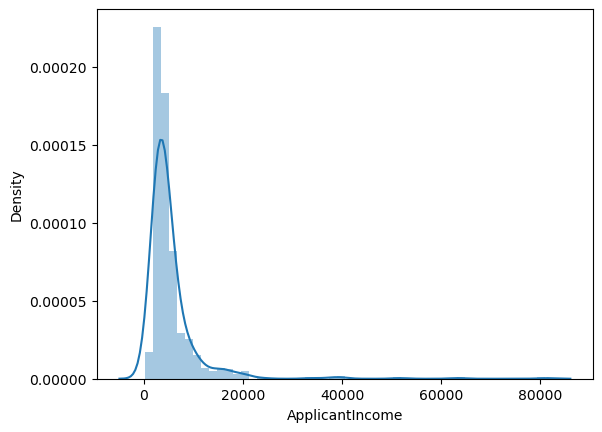

In [14]:
sns.distplot(dataset['ApplicantIncome'])

<Axes: ylabel='count'>

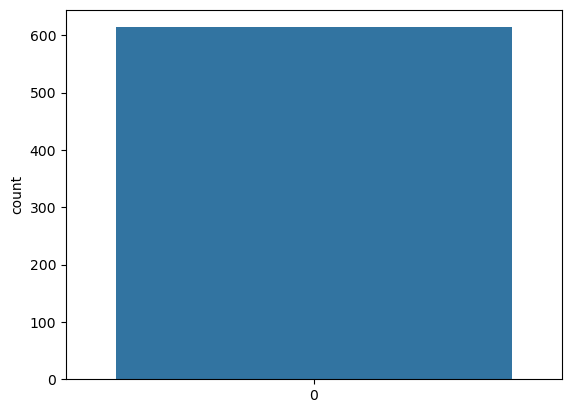

In [15]:
sns.countplot(dataset['LoanAmount'])

C:\Users\sandh\AppData\Local\Temp\ipykernel_6616\3981447511.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Credit_History'])


<Axes: xlabel='Credit_History', ylabel='Density'>

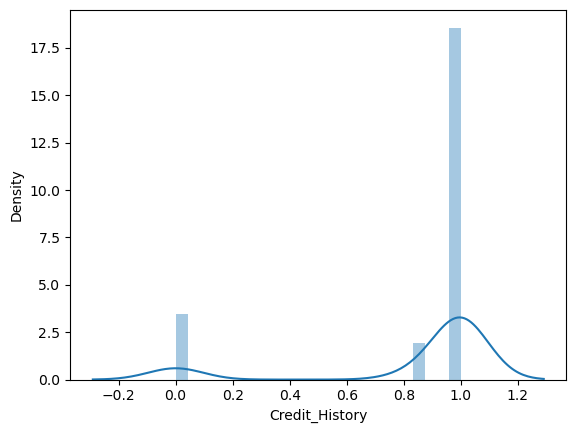

In [16]:
sns.distplot(dataset['Credit_History'])

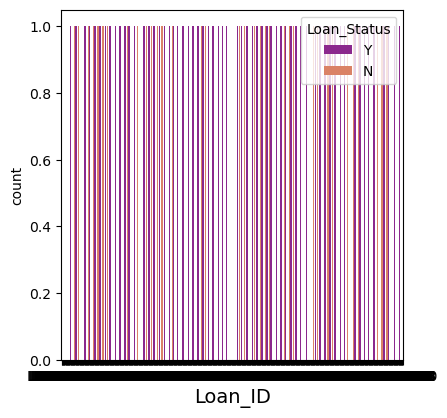

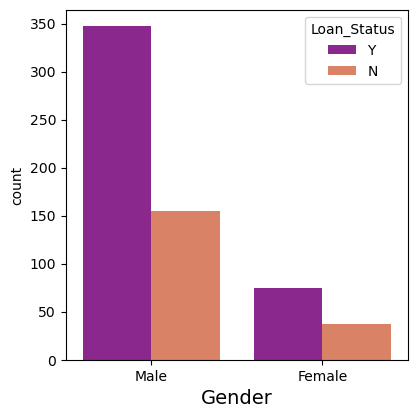

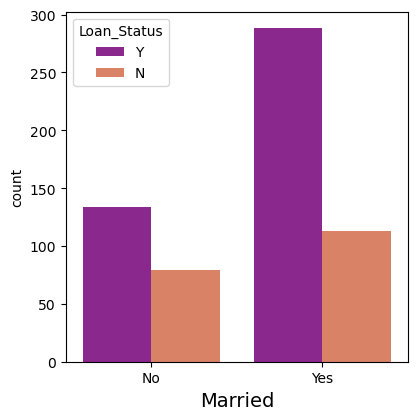

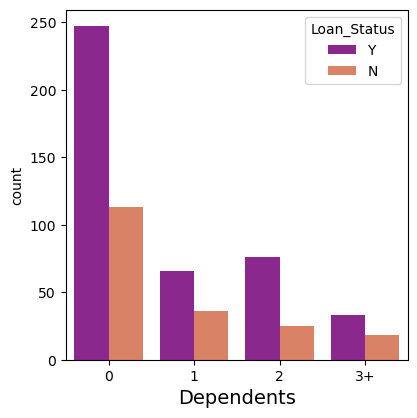

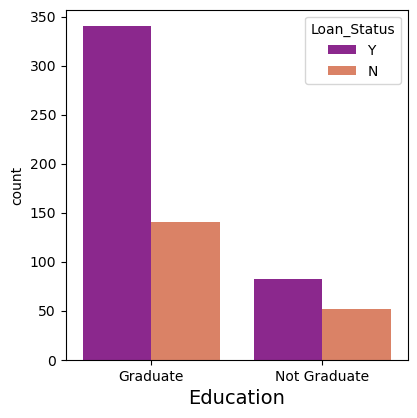

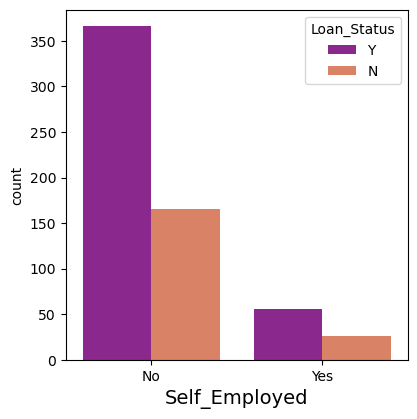

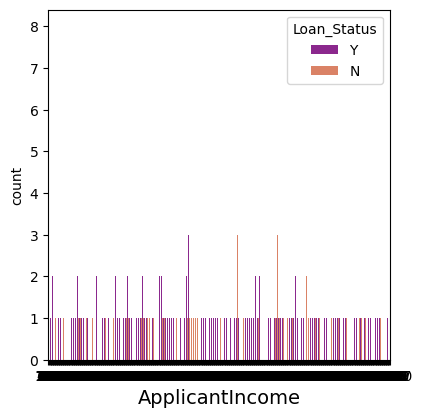

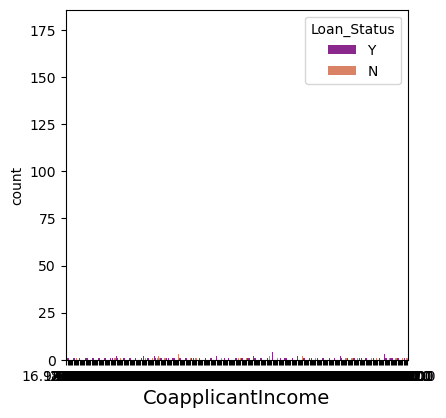

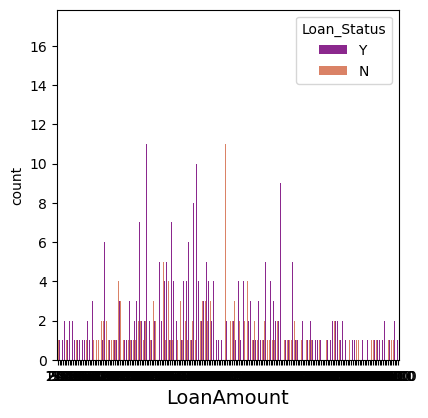

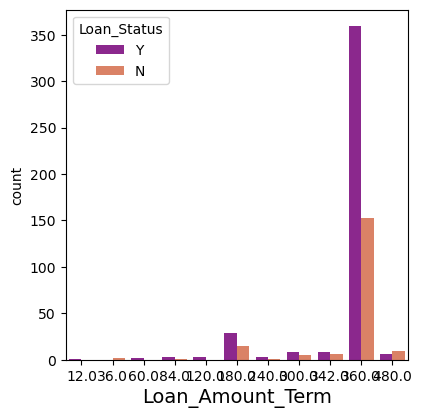

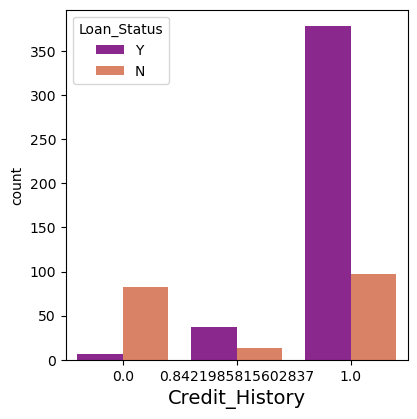

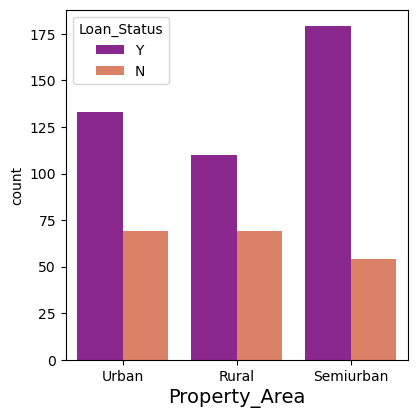

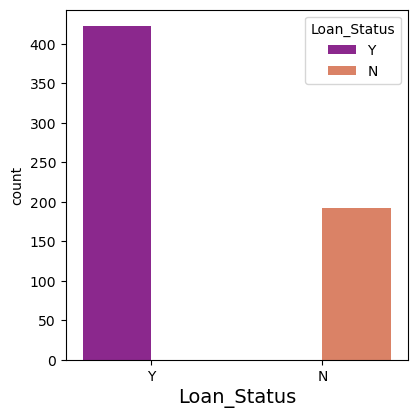

In [17]:
for i in dataset[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data = dataset ,palette='plasma')
    plt.xlabel(i, fontsize=14)

In [18]:
dataset['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

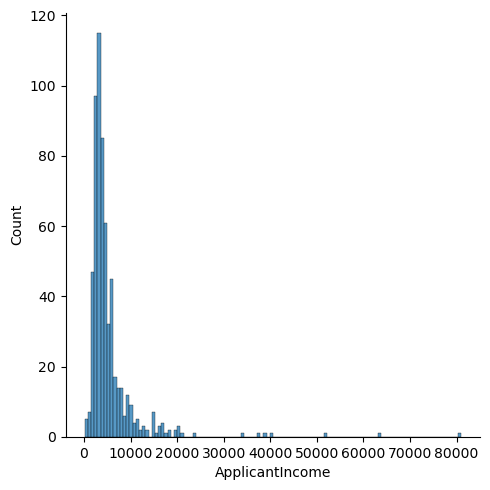

In [19]:
sns.displot(dataset['ApplicantIncome'])

Correlation Matrix

C:\Users\sandh\AppData\Local\Temp\ipykernel_6616\2316813072.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr() ,cmap='cubehelix_r')


<Axes: >

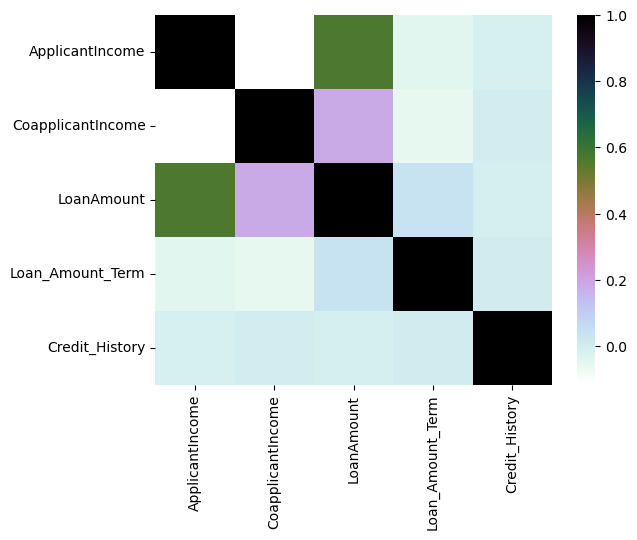

In [20]:
sns.heatmap(dataset.corr() ,cmap='cubehelix_r')

In [19]:
#correlation table
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\sandh\AppData\Local\Temp\ipykernel_6132\2118710382.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()
C:\Users\sandh\AppData\Local\Temp\ipykernel_6132\2118710382.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.00,-0.12,0.57,-0.05,-0.01
CoapplicantIncome,-0.12,1.00,0.19,-0.06,-0.00
LoanAmount,0.57,0.19,1.00,0.04,-0.01
Loan_Amount_Term,-0.05,-0.06,0.04,1.00,0.00
Credit_History,-0.01,-0.00,-0.01,0.00,1.00


In [20]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [21]:
dataset.shape

(614, 13)

In [22]:
#drop unnessary olumns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', "Loan_ID", "CoapplicantIncome"]
dataset = dataset.drop(columns= cols, axis = 1)
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


Label Encoding 

In [23]:

from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Education', 'Property_Area', 'Loan_Status', 'Dependents', 'Self_Employed', 'Credit_History']
le = LabelEncoder()
for col in cols:
    dataset[col] =le.fit_transform(dataset[col])

In [24]:
dataset

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,2,2,1
1,1,1,1,0,0,2,0,0
2,1,1,0,0,1,2,2,1
3,1,1,0,1,0,2,2,1
4,1,0,0,0,0,2,2,1
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2,0,1
610,1,1,3,0,0,2,0,1
611,1,1,1,0,0,2,2,1
612,1,1,2,0,0,2,2,1


Split data into Independent & Dependent Variables


In [25]:
X = dataset.drop("Loan_Status", axis = 1) # Independent Variable

In [26]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,2,2
1,1,1,1,0,0,2,0
2,1,1,0,0,1,2,2
3,1,1,0,1,0,2,2
4,1,0,0,0,0,2,2
...,...,...,...,...,...,...,...
609,0,0,0,0,0,2,0
610,1,1,3,0,0,2,0
611,1,1,1,0,0,2,2
612,1,1,2,0,0,2,2


In [27]:
y = dataset["Loan_Status"] # dependent Variable

In [28]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [31]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
83,1,1,0,0,0,1,1
90,1,1,0,0,0,2,1
227,1,1,2,0,0,2,1
482,1,1,0,0,0,2,1
464,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
71,1,1,2,1,1,2,1
106,1,1,2,0,0,2,2
270,0,0,0,0,0,2,2
435,0,1,0,0,0,2,1


In [32]:
X_train.shape

(491, 7)

In [33]:
X_test.shape

(123, 7)

Building the Decision Tree Model

    Decision Tree
    Random Forest
    XGBoost
    Logistic Regression



Building The Decision Tree

Model Training

In [34]:
# Classify function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
    model.fit(X_train, y_train)
    print("Accuracy is", model.score(X_test, y_test)*100)
    #cross valdation = it is used for better validation of model
    score = cross_val_score(model, X, y, cv = 5)
    print("Cross Validation is", np.mean(score)*100)

Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 79.67479674796748
Cross Validation is 79.31893909103026


Building the Decision Tree Model 

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
dt_model = DecisionTreeRegressor(criterion = "squared_error")  

In [38]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

Prediction

In [39]:
y_pred = dt_model.predict(X_test)

In [40]:
y_pred

array([0.91428571, 0.5       , 1.        , 0.57142857, 0.78947368,
       0.5       , 1.        , 1.        , 0.5       , 1.        ,
       0.        , 0.69565217, 1.        , 0.66666667, 0.5       ,
       0.83333333, 0.61904762, 0.78947368, 0.66666667, 0.91428571,
       0.94117647, 1.        , 0.91428571, 0.66666667, 0.5       ,
       0.71428571, 1.        , 0.78947368, 1.        , 1.        ,
       0.8125    , 1.        , 1.        , 0.61904762, 0.57142857,
       0.        , 0.94117647, 1.        , 1.        , 1.        ,
       0.61904762, 0.8       , 1.        , 0.69565217, 0.61904762,
       0.75      , 1.        , 0.        , 0.33333333, 0.2       ,
       0.        , 0.90909091, 0.        , 1.        , 0.94117647,
       0.66666667, 0.61904762, 1.        , 0.        , 1.        ,
       0.        , 0.5       , 0.        , 1.        , 0.8125    ,
       1.        , 1.        , 1.        , 1.        , 0.66666667,
       0.        , 0.94117647, 1.        , 1.        , 0.     

In [41]:
y_test

350    1
377    1
163    1
609    1
132    1
      ..
231    1
312    1
248    1
11     1
333    1
Name: Loan_Status, Length: 123, dtype: int32

In [42]:
y_pred_train = dt_model.predict(X_train)

Evaluation

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
mse = mean_squared_error(y_test, y_pred)

In [45]:
rmse = np.sqrt(mse)

In [46]:
rmse

0.45149798730557816

In [47]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

In [48]:
rmse_train

0.311272154322739

In [49]:
mae = mean_absolute_error(y_test, y_pred)

In [50]:
mae

0.2994830702806041

In [51]:
print("Test data r2_score::", r2_score(y_test, y_pred))

Test data r2_score:: 0.10347290874633486


In [52]:
print("Train data r2_score::", r2_score(y_train, y_pred_train))

Train data r2_score:: 0.5416142029446231


In [53]:
from  sklearn.tree import plot_tree

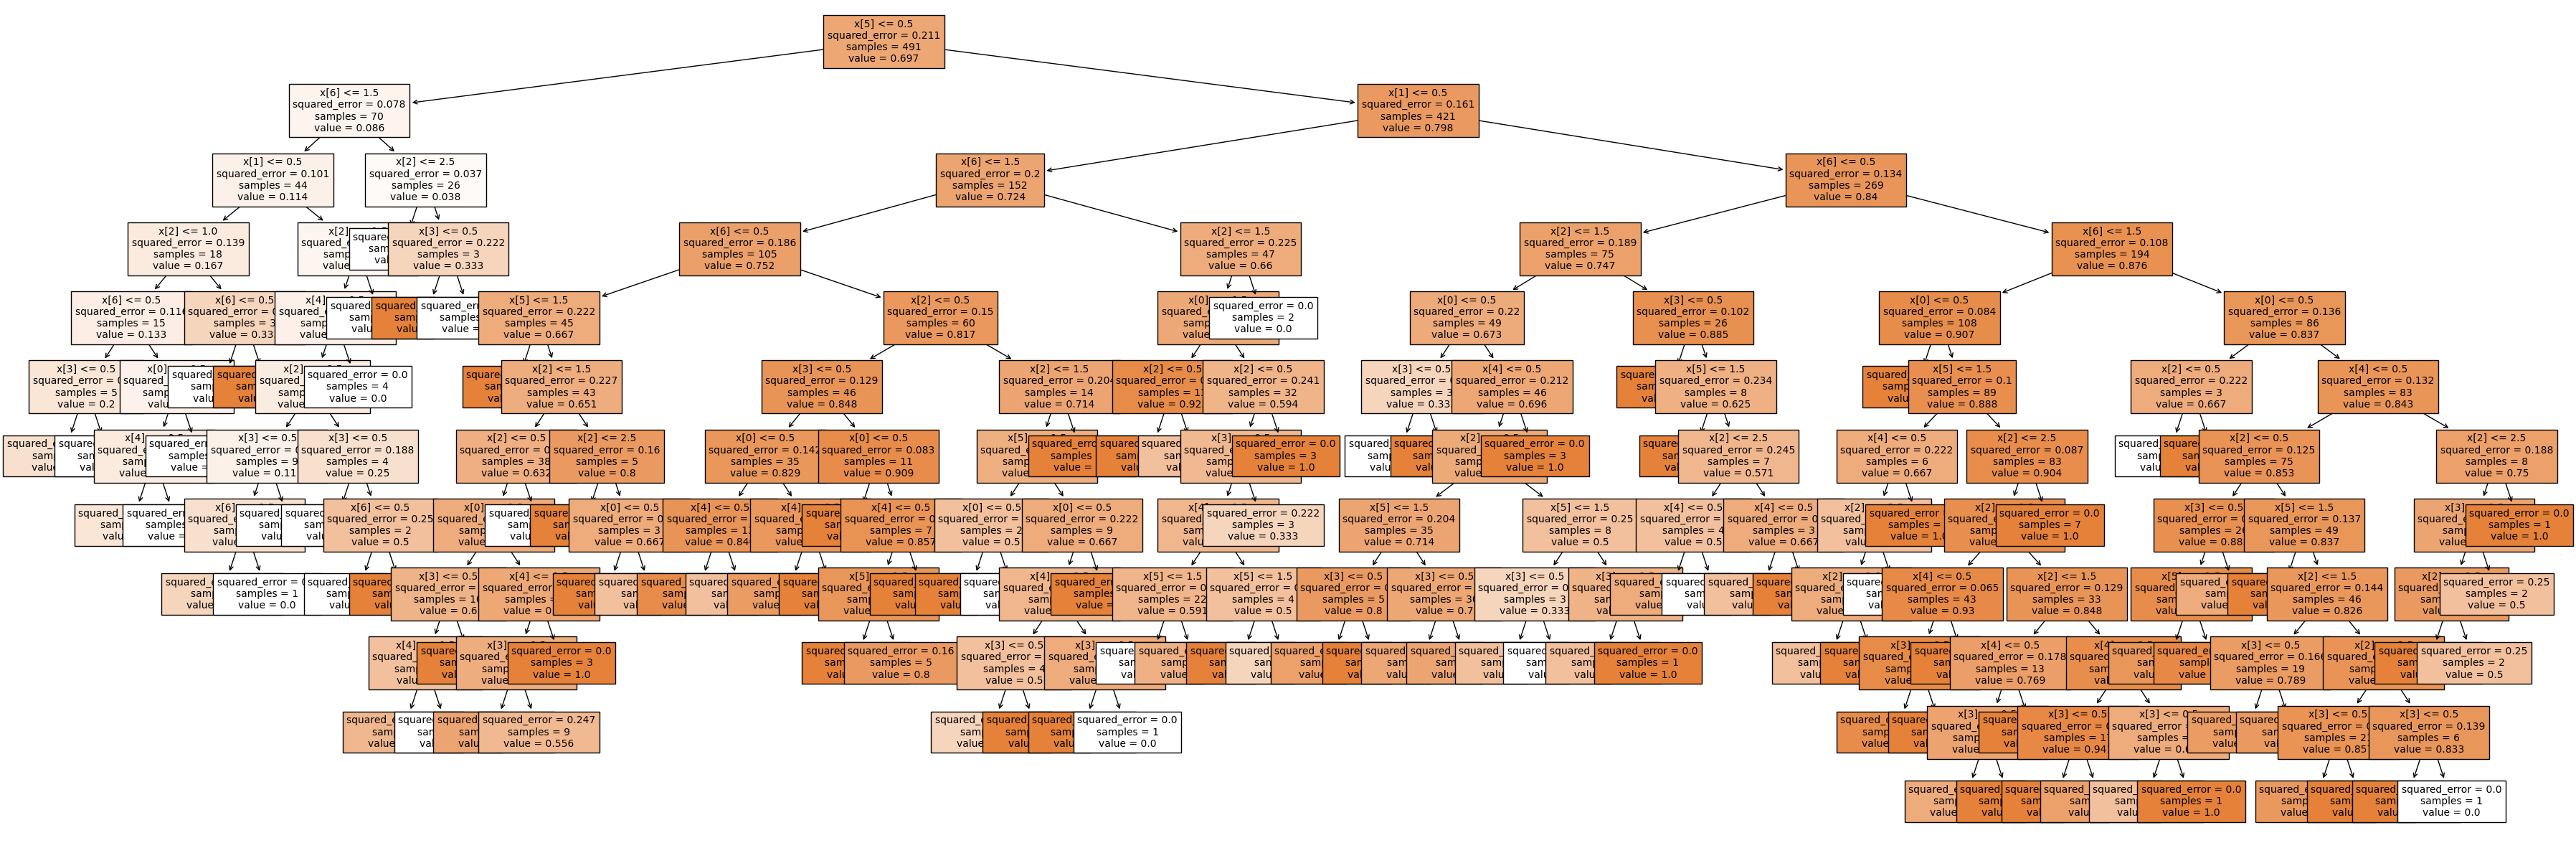

In [54]:
plt.figure(figsize = (45, 15))
plot_tree(dt_model, filled = True, fontsize=10)
plt.show()

Random Forest classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)
model.fit(X_train, y_train)

Accuracy is 76.42276422764228
Cross Validation is 76.06690657070504


RandomForestClassifier()

In [56]:
model = ExtraTreesClassifier()
classify(model, X, y)
model.fit(X_train, y_train)

Accuracy is 74.79674796747967
Cross Validation is 74.76076236172197


ExtraTreesClassifier()

Hyperparameter Tunning

In [57]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 25, max_depth = 7, max_features = 1)
classify(model, X, y)

Accuracy is 78.86178861788618
Cross Validation is 80.9462881514061


Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[18, 25],
       [ 1, 79]], dtype=int64)

<Axes: >

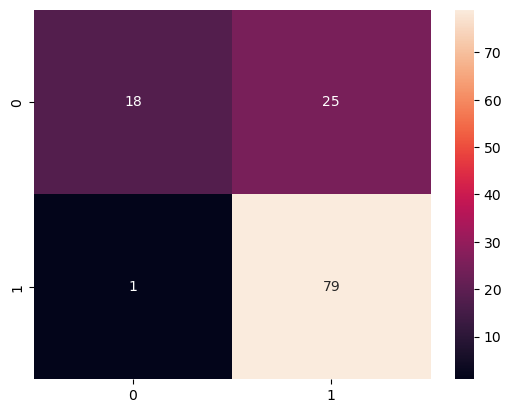

In [59]:
sns.heatmap(cm, annot = True)